<a href="https://colab.research.google.com/github/navendu10/MLmodels_NB/blob/main/Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from tensorflow.keras.layers import Dense, Flatten, Input, LSTM, Embedding, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2024-08-20 03:44:41--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2024-08-20 03:44:42 (12.4 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [6]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df = df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns = ['labels', 'data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam':1})
Y = df['b_labels'].values

In [15]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33)

In [19]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [20]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7136 unique tokens.


In [21]:
data_train = pad_sequences(sequence_train)
print("Shape of data_train: ", data_train.shape)

Shape of data_train:  (3733, 121)


In [23]:
T = data_train.shape[1]
T

121

In [29]:
data_test = pad_sequences(sequence_test, maxlen = T)

In [30]:
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

In [31]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Y_train,
  epochs=15,
  validation_data=(data_test, Y_test)
)

Training model...
Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8119 - loss: 0.5305 - val_accuracy: 0.8787 - val_loss: 0.2774
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8890 - loss: 0.2289 - val_accuracy: 0.9777 - val_loss: 0.0947
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9891 - loss: 0.0619 - val_accuracy: 0.9821 - val_loss: 0.0723
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9958 - loss: 0.0297 - val_accuracy: 0.9842 - val_loss: 0.0681
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9968 - loss: 0.0201 - val_accuracy: 0.9837 - val_loss: 0.0647
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9982 - loss: 0.0160 - val_accuracy: 0.9842 - val_loss: 0.0719
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9986 - loss: 0.0090 - val_accuracy: 0.9842 - val_loss: 0.0701
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9988 - lo

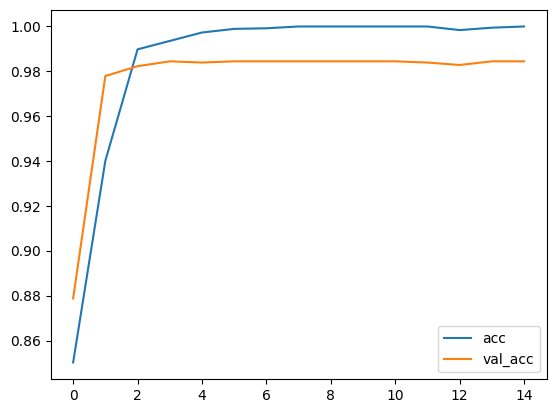

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

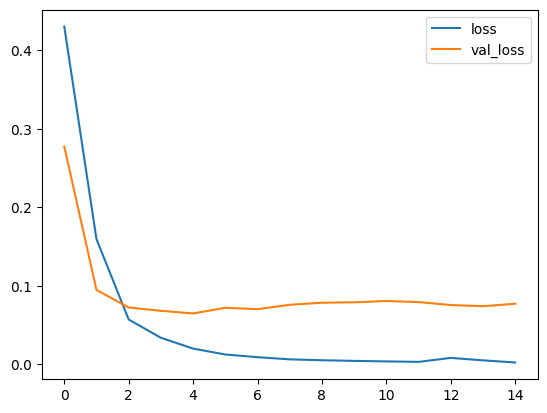

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 121)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 121, 20)             │         142,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 121, 15)             │           2,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 15)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 434,750 (1.66 MB)

 Trainable params: 144,916 (566.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,834 (1.11 MB)